판다스는 날짜, 시간, 시간 인덱스를 가진 데이터를 다루는데 아주 유용함

날짜와 시간 데이터는 아래의 세 종류가 있다.

(1) 타임 스탬프 == 특정 시점을 의미 (예) 2015년 6월 4일 오전 7시
(2) 시간 간격 혹은 기간 == 특정 시작점과 종료점 사이의 시간의 길이 (예) 2015년, 24시간 등
(3) 시간 델타(time delta) 혹은 지속 시간(duration) == 전확한 시간의 길이 (예) 22,56초 등 

기본 파이썬의 날짜와 시간: datetime과 dateutil

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
#요일 출력 작업

date.strftime('%A')

'Saturday'

Numpy의 지정된 시간 배열: Numpy의 datetime64

datetime64 dtype은 날짜를 64비트 정수로 인코딩해 날짜 배열을 매우 간결하게 표현함
그리고 상당히 구체적인 입력 형식이 필요함

In [8]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [9]:
# 이후는 벡터화된 연산을 지원한다

date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

Pandas에서의 날짜와 시간: 파이썬과 넘파이의 장점이 모두 결합됨

Timestamp라는 객체를 제공하고 이 객체 그룹으로 부터 Series나 DataFrame 데이터에 인덱스를 지정하는데 사용할 수 있는 DatetimeIndex를 구성할 수 있다

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

Pandas 시계열 : 시간으로 인덱싱하기

Pandas 시계열 도구는 실제로 타임스탬프로 데이터를 인덱싱할 때 아주 유용하다

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [16]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [17]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Pandas 시계열 데이터 구조

(1) time stamp 의 경우 Timestamp 타입을 제공하며 관련 인덱스 구조는 DatetimeIndex
(2) time period 의 경우 Period 타입을 제공하며 관련 인덱스 구조는 PeriodIndex
(3) time delta의 경우 Timedelta 타입을 제공하며 관련 인덱스 구조는 TimedeltaIndex

In [18]:
# 단일 날짜를 pd.to_datetime()에 전달하면 Timestamp를 생성하고
# 일련의 날짜를 전달하면 DatetimeIndex를 생성하는 것이 기본

dates = pd.to_datetime([datetime(2015,7,3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [19]:
# DatetimeIndex는 to_period() 함수에 주기(frequency)를 추가해 PeriodIndex로 전환 가능

dates.to_period('D') # 일별 주기를 나타내는 'D" 사용

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [20]:
# 여기서 어떤 날짜에서 어떤 날짜를 빼면 TimedeltaIndex가 생성된다

dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

시간 관련 데이터 정규 시퀀스 만들기(기본 주기는 일단위)

(1) 타임 스탬프 == pd.date_range()
(2) 기간 == pd.period_range()
(3) 시간 델타 == pd.timedelta_range()

In [21]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [24]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [26]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

페이지 228과 229의 주기코드 및 주기코드 시작 시점 표시하는 목록 참조

In [27]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

DataOffset 객체가 있음 (예) 영업일만 뽑아내기

In [28]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

리샘플링/시프팅/윈도잉

In [29]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='google')
goog.head()

ModuleNotFoundError: No module named 'pandas_datareader'

In [30]:
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD')
data.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


In [31]:
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
                  index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [33]:
#편의상 열 이름을 단축하고 'Total'열을 추가하자

data.columns = ['West', 'East']
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [36]:
data['Total'] = data.eval('West + East')
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [39]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


Text(0,0.5,'Hourly Bicycle Count')

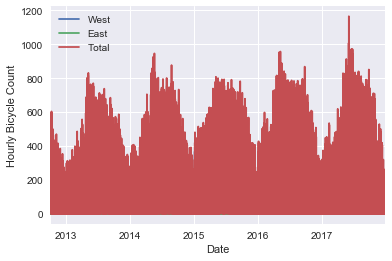

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0,0.5,'Weekly bicycle count')

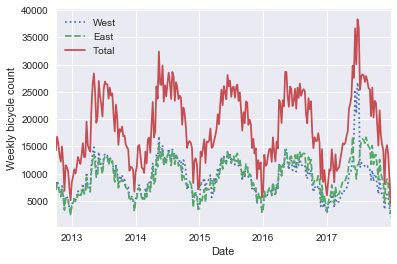

In [42]:
# 주단위로 리샘플링 해보기

weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0,0.5,'mean hourly count')

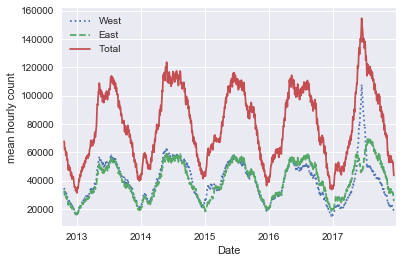

In [43]:
# 롤링 평균으로 해당 기간의 데이터가 중심에 오도록 조정

daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

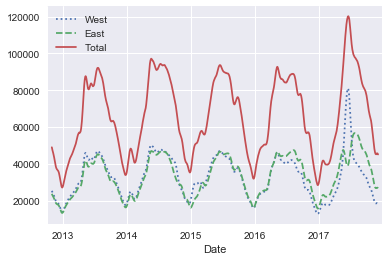

In [44]:
# 가우스 평할을 활용하기

daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

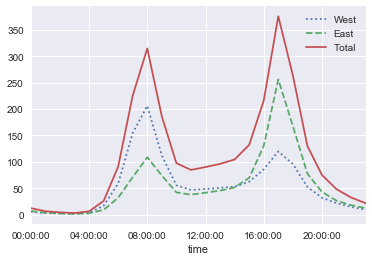

In [45]:
# 시간대별로 분석해보기

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

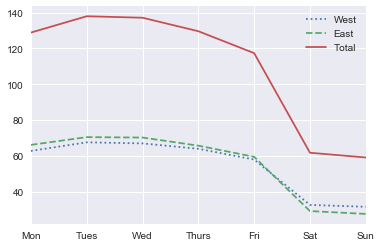

In [47]:
#요일별로 통행량 구하기

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-' ])

In [48]:
# 주중과 주말의 시간대별 차이를 알아보자

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

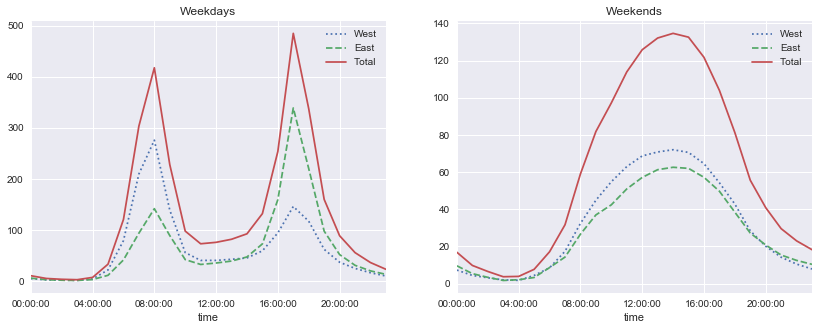

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-'])